<a href="https://colab.research.google.com/github/AndrewEPrince/codespaces-blank/blob/main/models/ballsnet/BallsNetTraining73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Installs
!pip install tensorflow --upgrade
!pip install tensorflow-gpu --upgrade
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [ ]:
#@title Imports
import os
# Set the KERAS_BACKEND environment variable to "jax"
os.environ["KERAS_BACKEND"] = "jax"
%load_ext tensorboard
import tensorboard

from datetime import datetime
from packaging import version
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import joblib
from google.colab import files
from tqdm import tqdm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Masking, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam, SGD, RMSprop, AdamW, Adadelta, Adagrad, Adamax, Nadam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import Accuracy, Precision, Recall, F1Score, AUC, CategoricalAccuracy, SparseCategoricalAccuracy
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler, EarlyStopping, Callback, ReduceLROnPlateau
from keras.regularizers import l2, L1L2, L2



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Get Season Data
group_urls = {
    """
    "season_17_urls" : {
    "https://ballchasing.com/api/groups/1premier-fljs2rxwse/" : 1,
    "https://ballchasing.com/api/groups/2master-er4ijj6bzr/" : 2,
    "https://ballchasing.com/api/groups/3elite-s8z53z7uh5/" : 3,
    "https://ballchasing.com/api/groups/4veteran-02ujkewot4/" : 4,
    "https://ballchasing.com/api/groups/5rival-mrp8b1bamo/" : 5,
    "https://ballchasing.com/api/groups/6challenger-a3a3j0nkec/" : 6,
    "https://ballchasing.com/api/groups/7prospect-jt1f5epq9r/" : 7,
    "https://ballchasing.com/api/groups/8contender-9n998x8mm8/" : 8,
    "https://ballchasing.com/api/groups/9amateur-wmq7szund6/" : 9
    }
    ,
    "season_18_urls" : {
    "https://ballchasing.com/api/groups/1premier-0bltbgd7ox/" : 1,
    "https://ballchasing.com/api/groups/2master-oe6pooca8v/" : 2,
    "https://ballchasing.com/api/groups/3elite-n4j3g5puuo/" : 3,
    "https://ballchasing.com/api/groups/4veteran-ntqifly5e6/" : 4,
    "https://ballchasing.com/api/groups/5rival-07eg1qhi9a/" : 5,
    "https://ballchasing.com/api/groups/6challenger-57i0g8cxr5/" : 6,
    "https://ballchasing.com/api/groups/7prospect-qyyo3i7lvm/" : 7,
    "https://ballchasing.com/api/groups/8contender-gjm3xw4bb5/" : 8,
    "https://ballchasing.com/api/groups/9amateur-zmcevpgmnn/" : 9
  }
  """
  "APtest_17_urls": {
      "https://ballchasing.com/api/groups/match-day-12-zk4j6i0y6u/":1,"https://ballchasing.com/api/groups/match-day-13-fhpg56dfas/":1,"https://ballchasing.com/api/groups/match-day-14-lpxl8dj121/":1,
      "https://ballchasing.com/api/groups/match-day-01-0rz9aunmla/":1,"https://ballchasing.com/api/groups/match-day-02-ymlq7ojo45/":1,"https://ballchasing.com/api/groups/match-day-03-jrxozu59b6/":1,
      "https://ballchasing.com/api/groups/match-day-04-szjknyw8pc/":1,"https://ballchasing.com/api/groups/match-day-05-82cfhxxthb/":1,"https://ballchasing.com/api/groups/match-day-06-p87hcouok4/":1,
      "https://ballchasing.com/api/groups/match-day-07-qo71aws58q/":1,"https://ballchasing.com/api/groups/match-day-08-fsu62hzlfc/":1,"https://ballchasing.com/api/groups/match-day-09-holhnj301i/":1,
      "https://ballchasing.com/api/groups/match-day-10-y3y805xn41/":1,"https://ballchasing.com/api/groups/match-day-11-ofm2n9i93f/":1,

      "https://ballchasing.com/api/groups/match-day-01-50zog9ysvt/":2,"https://ballchasing.com/api/groups/match-day-06-r83uup3psb/":2,"https://ballchasing.com/api/groups/match-day-11-q6lgvt15pw/":2,
      "https://ballchasing.com/api/groups/match-day-02-tox3k89wjm/":2,"https://ballchasing.com/api/groups/match-day-07-gvchewhnnc/":2,"https://ballchasing.com/api/groups/match-day-12-gntnmkufr0/":2,
      "https://ballchasing.com/api/groups/match-day-03-0f7l348yrb/":2,"https://ballchasing.com/api/groups/match-day-08-r0s2zkk3o8/":2,"https://ballchasing.com/api/groups/match-day-13-q8ue8j6m4j/":2,
      "https://ballchasing.com/api/groups/match-day-04-gyam6u3apy/":2,"https://ballchasing.com/api/groups/match-day-09-fa8v86hv33/":2,"https://ballchasing.com/api/groups/match-day-14-mu0ffje1zd/":2,
      "https://ballchasing.com/api/groups/match-day-05-obl669dh9w/":2,"https://ballchasing.com/api/groups/match-day-10-c15hje6haj/":2,"https://ballchasing.com/api/groups/match-day-15-3fng80aoh0/":2,

      "https://ballchasing.com/api/groups/match-day-01-w02v0peppi/":3,"https://ballchasing.com/api/groups/match-day-07-va20jwdq1z/":3,"https://ballchasing.com/api/groups/match-day-12-p9qxznqull/":3,
      "https://ballchasing.com/api/groups/match-day-02-5ooqwzcn63/":3,"https://ballchasing.com/api/groups/match-day-08-u8uvj2bfnx/":3,"https://ballchasing.com/api/groups/match-day-13-ebi5gllo3b/":3,
      "https://ballchasing.com/api/groups/match-day-03-u45b5vq3do/":3,"https://ballchasing.com/api/groups/match-day-09-280z675i2d/":3,"https://ballchasing.com/api/groups/match-day-14-6aeh97wxnl/":3,
      "https://ballchasing.com/api/groups/match-day-04-6imjannqk8/":3,"https://ballchasing.com/api/groups/match-day-10-dd1mkp8kem/":3,"https://ballchasing.com/api/groups/match-day-15-gzwmp652kj/":3,
      "https://ballchasing.com/api/groups/match-day-05-i93zusww2c/":3,"https://ballchasing.com/api/groups/match-day-11-k1vdc3mpo0/":3,"https://ballchasing.com/api/groups/match-day-16-ewlxpnt7tg/":3,
      "https://ballchasing.com/api/groups/match-day-06-549bpbx3is/":3,

      "https://ballchasing.com/api/groups/match-day-01-3yg1hbef2a/":4,"https://ballchasing.com/api/groups/match-day-07-snunfv8i9z/":4,"https://ballchasing.com/api/groups/match-day-12-3ozl27n5v8/":4,
      "https://ballchasing.com/api/groups/match-day-02-l2j0qnl7b0/":4,"https://ballchasing.com/api/groups/match-day-08-u4wlfmgk7i/":4,"https://ballchasing.com/api/groups/match-day-13-hd5yan835l/":4,
      "https://ballchasing.com/api/groups/match-day-03-oup34h2doq/":4,"https://ballchasing.com/api/groups/match-day-09-crfw6103mx/":4,"https://ballchasing.com/api/groups/match-day-14-lsyto6o9os/":4,
      "https://ballchasing.com/api/groups/match-day-04-7kss1zl5ml/":4,"https://ballchasing.com/api/groups/match-day-10-kfi63adis3/":4,"https://ballchasing.com/api/groups/match-day-15-ilv2cz9pwf/":4,
      "https://ballchasing.com/api/groups/match-day-05-7ebvls5zpw/":4,"https://ballchasing.com/api/groups/match-day-11-gebtr5fbzc/":4,"https://ballchasing.com/api/groups/match-day-16-7a4m6w1w9b/":4,
      "https://ballchasing.com/api/groups/match-day-06-7xa5jtb5k9/":4,

      "https://ballchasing.com/api/groups/match-day-01-7i5dzgzyhw/":5,"https://ballchasing.com/api/groups/match-day-07-2cfqcdmus4/":5,"https://ballchasing.com/api/groups/match-day-12-tjvg952orv/":5,
      "https://ballchasing.com/api/groups/match-day-02-0a8sb81odo/":5,"https://ballchasing.com/api/groups/match-day-08-hosebnzo7x/":5,"https://ballchasing.com/api/groups/match-day-13-thl63ho5c0/":5,
      "https://ballchasing.com/api/groups/match-day-03-z6fs7apt7m/":5,"https://ballchasing.com/api/groups/match-day-09-1lrhicgnqn/":5,"https://ballchasing.com/api/groups/match-day-14-yxudkle25z/":5,
      "https://ballchasing.com/api/groups/match-day-04-wbco671h9v/":5,"https://ballchasing.com/api/groups/match-day-10-av2um34gpv/":5,"https://ballchasing.com/api/groups/match-day-15-fddwqktg23/":5,
      "https://ballchasing.com/api/groups/match-day-05-0vffks4os7/":5,"https://ballchasing.com/api/groups/match-day-11-fyf75xgmpp/":5,"https://ballchasing.com/api/groups/match-day-16-hbwtjg06qg/":5,
      "https://ballchasing.com/api/groups/match-day-06-9k9f7j10m7/":5,

      "https://ballchasing.com/api/groups/match-day-01-gtepow09hv/":6,"https://ballchasing.com/api/groups/match-day-06-25fuejgf53/":6,"https://ballchasing.com/api/groups/match-day-11-lncy56mivn/":6,
      "https://ballchasing.com/api/groups/match-day-02-d2t90r98d5/":6,"https://ballchasing.com/api/groups/match-day-07-i8zpnj5p55/":6,"https://ballchasing.com/api/groups/match-day-12-xj70oyk07b/":6,
      "https://ballchasing.com/api/groups/match-day-03-8itb1t2469/":6,"https://ballchasing.com/api/groups/match-day-08-km8rdn4cmr/":6,"https://ballchasing.com/api/groups/match-day-13-m25jayi3k8/":6,
      "https://ballchasing.com/api/groups/match-day-04-nzcue05y8r/":6,"https://ballchasing.com/api/groups/match-day-09-2e9eht4nxu/":6,"https://ballchasing.com/api/groups/match-day-14-2ljjji0b25/":6,
      "https://ballchasing.com/api/groups/match-day-05-bbzioxw34n/":6,"https://ballchasing.com/api/groups/match-day-10-pg4zl7veln/":6,"https://ballchasing.com/api/groups/match-day-15-2xbwkyfziz/":6,
      "https://ballchasing.com/api/groups/match-day-01-jclz1bymue/":7,"https://ballchasing.com/api/groups/match-day-06-1pxpqb7ffe/":7,"https://ballchasing.com/api/groups/match-day-10-ssnsrevvj7/":7,
      "https://ballchasing.com/api/groups/match-day-02-2kmvpn31je/":7,"https://ballchasing.com/api/groups/match-day-07-9szar2tya6/":7,"https://ballchasing.com/api/groups/match-day-11-nm8o40m3bl/":7,
      "https://ballchasing.com/api/groups/match-day-03-wz8itdons6/":7,"https://ballchasing.com/api/groups/match-day-08-kysoqecxhn/":7,"https://ballchasing.com/api/groups/match-day-12-zvycofqole/":7,
      "https://ballchasing.com/api/groups/match-day-04-f0prq6jspr/":7,"https://ballchasing.com/api/groups/match-day-09-bem2jpr0iy/":7,"https://ballchasing.com/api/groups/match-day-13-jgu3g2hp2m/":7,
      "https://ballchasing.com/api/groups/match-day-05-isx4cky60i/":7,

      "https://ballchasing.com/api/groups/match-day-01-2lwygtjard/":8,"https://ballchasing.com/api/groups/match-day-06-74s7kr5w9u/":8,"https://ballchasing.com/api/groups/match-day-10-rinwolq6h5/":8,
      "https://ballchasing.com/api/groups/match-day-02-mwhj3gtyz8/":8,"https://ballchasing.com/api/groups/match-day-07-ny26e2s8wh/":8,"https://ballchasing.com/api/groups/match-day-11-jtidhgiw0h/":8,
      "https://ballchasing.com/api/groups/match-day-03-60k1c8i7rv/":8,"https://ballchasing.com/api/groups/match-day-08-80c3yvf939/":8,"https://ballchasing.com/api/groups/match-day-12-i3kq8ywdca/":8,
      "https://ballchasing.com/api/groups/match-day-04-bnza4o5pfb/":8,"https://ballchasing.com/api/groups/match-day-09-5wgyel4v1k/":8,"https://ballchasing.com/api/groups/match-day-13-dcrqgubs2f/":8,
      "https://ballchasing.com/api/groups/match-day-05-xxqwgsijsp/":8,"https://ballchasing.com/api/groups/match-day-14-r8n1jq2ip9/":8,

      "https://ballchasing.com/api/groups/match-day-01-1as4mqhqa4/":9,"https://ballchasing.com/api/groups/match-day-06-33g1g9kzgm/":9,"https://ballchasing.com/api/groups/match-day-10-gxppjs0ifk/":9,
      "https://ballchasing.com/api/groups/match-day-02-wbaoq6t8v9/":9,"https://ballchasing.com/api/groups/match-day-07-fn7lcgxw69/":9,"https://ballchasing.com/api/groups/match-day-11-zs5znbfkfi/":9,
      "https://ballchasing.com/api/groups/match-day-03-wojm8ki3x7/":9,"https://ballchasing.com/api/groups/match-day-08-cxktla4vw3/":9,"https://ballchasing.com/api/groups/match-day-12-2vwccw7pae/":9,
      "https://ballchasing.com/api/groups/match-day-04-1y56yj2w7n/":9,"https://ballchasing.com/api/groups/match-day-09-c0foqq7e6e/":9,"https://ballchasing.com/api/groups/match-day-13-edgpfdchpo/":9,
      "https://ballchasing.com/api/groups/match-day-05-ngyywazy0p/":9,"https://ballchasing.com/api/groups/match-day-14-9pc336t17m/":9
  },

    "APtest_18_urls" : {
      "https://ballchasing.com/api/groups/match-day-01-hbpeza9an4/":1,"https://ballchasing.com/api/groups/match-day-02-f9b0tra5ba/":1,"https://ballchasing.com/api/groups/match-day-03-b1cx27fr39/":1,
      "https://ballchasing.com/api/groups/match-day-04-wljh2aa4l5/":1,"https://ballchasing.com/api/groups/match-day-05-ljbvtcyy84/":1,"https://ballchasing.com/api/groups/match-day-06-sluiskjppd/":1,
      "https://ballchasing.com/api/groups/match-day-07-snmx3c32ls/":1,"https://ballchasing.com/api/groups/match-day-08-pwrby7f2ql/":1,"https://ballchasing.com/api/groups/match-day-09-u5qw7eff3a/":1,
      "https://ballchasing.com/api/groups/match-day-10-ipm9eiv0ib/":1,"https://ballchasing.com/api/groups/match-day-11-6e12kakhfy/":1,"https://ballchasing.com/api/groups/match-day-12-2xgdfx4f5f/":1,
      "https://ballchasing.com/api/groups/match-day-13-ik4pzwiwyk/":1,"https://ballchasing.com/api/groups/match-day-14-o63wh01bux/":1,

      "https://ballchasing.com/api/groups/match-day-01-n8ya5dfhau/":2,"https://ballchasing.com/api/groups/match-day-02-xwdzs2n33b/":2,"https://ballchasing.com/api/groups/match-day-03-l8rw9a91cq/":2,
      "https://ballchasing.com/api/groups/match-day-04-qh9b7haose/":2,"https://ballchasing.com/api/groups/match-day-05-k735wzlbv1/":2,"https://ballchasing.com/api/groups/match-day-06-7qy8w2gqen/":2,
      "https://ballchasing.com/api/groups/match-day-07-wopokvuttw/":2,"https://ballchasing.com/api/groups/match-day-08-m595mrxcjq/":2,"https://ballchasing.com/api/groups/match-day-09-rxpb8m4fwl/":2,
      "https://ballchasing.com/api/groups/match-day-10-d22bmu557n/":2,"https://ballchasing.com/api/groups/match-day-11-gj3xw48svb/":2,"https://ballchasing.com/api/groups/match-day-12-6yrzr9m0ex/":2,
      "https://ballchasing.com/api/groups/match-day-13-wjqs6imj5p/":2,"https://ballchasing.com/api/groups/match-day-14-1ryv50soku/":2,"https://ballchasing.com/api/groups/match-day-15-pla2lpwle4/":2,

      "https://ballchasing.com/api/groups/match-day-01-wppd6zp271/":3,"https://ballchasing.com/api/groups/match-day-02-vgr9r2s2bq/":3,"https://ballchasing.com/api/groups/match-day-03-ikzawftysk/":3,
      "https://ballchasing.com/api/groups/match-day-04-llvvhkmmfr/":3,"https://ballchasing.com/api/groups/match-day-05-f4vwpkwiq9/":3,"https://ballchasing.com/api/groups/match-day-06-qqhyggkpfi/":3,
      "https://ballchasing.com/api/groups/match-day-07-vcnvb2zko2/":3,"https://ballchasing.com/api/groups/match-day-08-9cs8jwc8tj/":3,"https://ballchasing.com/api/groups/match-day-09-9lenakdbu2/":3,
      "https://ballchasing.com/api/groups/match-day-10-x932r4b087/":3,"https://ballchasing.com/api/groups/match-day-11-8migyg5eip/":3,"https://ballchasing.com/api/groups/match-day-12-2co6voflo6/":3,
      "https://ballchasing.com/api/groups/match-day-13-6w7xdprox9/":3,"https://ballchasing.com/api/groups/match-day-14-4z7j9axdwh/":3,"https://ballchasing.com/api/groups/match-day-15-fnsiiywezh/":3,
      "https://ballchasing.com/api/groups/match-day-16-4e2toeo4rn/":3,




      "https://ballchasing.com/api/groups/match-day-01-40j58clevn/":4,"https://ballchasing.com/api/groups/match-day-07-787624tito/":4,"https://ballchasing.com/api/groups/match-day-12-exnuwe3fpf/":4,
      "https://ballchasing.com/api/groups/match-day-02-np89206epk/":4,"https://ballchasing.com/api/groups/match-day-08-kwkayyxhq0/":4,"https://ballchasing.com/api/groups/match-day-13-5rhi5uh0pe/":4,
      "https://ballchasing.com/api/groups/match-day-03-flolbfr184/":4,"https://ballchasing.com/api/groups/match-day-09-djvhby1707/":4,"https://ballchasing.com/api/groups/match-day-14-nkenla7shg/":4,
      "https://ballchasing.com/api/groups/match-day-04-8akwj3a3q7/":4,"https://ballchasing.com/api/groups/match-day-10-f1zkfinieu/":4,"https://ballchasing.com/api/groups/match-day-15-y2105mlnt3/":4,
      "https://ballchasing.com/api/groups/match-day-05-e67fqrs9bc/":4,"https://ballchasing.com/api/groups/match-day-11-iwf1fhyqsk/":4,"https://ballchasing.com/api/groups/match-day-16-10gyilwywl/":4,
      "https://ballchasing.com/api/groups/match-day-06-lgqxd1vjxv/":4,

      "https://ballchasing.com/api/groups/match-day-01-kaatsayx2n/":5,"https://ballchasing.com/api/groups/match-day-02-ljx4dcz1bb/":5,"https://ballchasing.com/api/groups/match-day-03-tabo1gr366/":5,
      "https://ballchasing.com/api/groups/match-day-04-r51kbv4gbm/":5,"https://ballchasing.com/api/groups/match-day-05-2n0e1zaejv/":5,"https://ballchasing.com/api/groups/match-day-06-vt18611jhc/":5,
      "https://ballchasing.com/api/groups/match-day-07-3wn3q8cwup/":5,"https://ballchasing.com/api/groups/match-day-08-uc9awlxysd/":5,"https://ballchasing.com/api/groups/match-day-09-c33wo9bgcb/":5,
      "https://ballchasing.com/api/groups/match-day-10-3axgf20ybz/":5,"https://ballchasing.com/api/groups/match-day-11-nz00qj7gwz/":5,"https://ballchasing.com/api/groups/match-day-12-l6aq93iu4j/":5,
      "https://ballchasing.com/api/groups/match-day-13-8kt80dqbsy/":5,"https://ballchasing.com/api/groups/match-day-14-p642aalycr/":5,"https://ballchasing.com/api/groups/match-day-15-x5g761u3px/":5,
      "https://ballchasing.com/api/groups/match-day-16-ahu1g5nq5u/":5,

      "https://ballchasing.com/api/groups/match-day-01-b2s52zeful/":6,"https://ballchasing.com/api/groups/match-day-02-iz7clmbfi8/":6,"https://ballchasing.com/api/groups/match-day-03-n9mvj31qac/":6,
      "https://ballchasing.com/api/groups/match-day-04-tzh2hbj3gj/":6,"https://ballchasing.com/api/groups/match-day-05-9faeut18pm/":6,"https://ballchasing.com/api/groups/match-day-06-bkbe0dt8i4/":6,
      "https://ballchasing.com/api/groups/match-day-07-zdr0kpo7ci/":6,"https://ballchasing.com/api/groups/match-day-08-ewig88zvfv/":6,"https://ballchasing.com/api/groups/match-day-09-rghdrzq1xv/":6,
      "https://ballchasing.com/api/groups/match-day-10-hphc0bxwj7/":6,"https://ballchasing.com/api/groups/match-day-11-4ih2ig3cow/":6,"https://ballchasing.com/api/groups/match-day-12-e5a55le9tn/":6,
      "https://ballchasing.com/api/groups/match-day-13-ws0szsh6l0/":6,"https://ballchasing.com/api/groups/match-day-14-43hfclt2q4/":6,"https://ballchasing.com/api/groups/match-day-15-isj9w04u9x/":6,

      "https://ballchasing.com/api/groups/match-day-01-64diivpyax/":7,"https://ballchasing.com/api/groups/match-day-02-caa7nedndd/":7,"https://ballchasing.com/api/groups/match-day-03-470n9cwye9/":7,
      "https://ballchasing.com/api/groups/match-day-04-j64h7bbpu1/":7,"https://ballchasing.com/api/groups/match-day-05-2l3icfwwhw/":7,"https://ballchasing.com/api/groups/match-day-06-ibk1mlh3q4/":7,
      "https://ballchasing.com/api/groups/match-day-07-fne0ehi1fe/":7,"https://ballchasing.com/api/groups/match-day-08-c37puh4cww/":7,"https://ballchasing.com/api/groups/match-day-09-onegkubqwk/":7,
      "https://ballchasing.com/api/groups/match-day-10-3srbnctooj/":7,"https://ballchasing.com/api/groups/match-day-11-xzu8gz8ks4/":7,"https://ballchasing.com/api/groups/match-day-12-wxdqwy5gn2/":7,
      "https://ballchasing.com/api/groups/match-day-13-v62n3ry8nj/":7,

      "https://ballchasing.com/api/groups/match-day-01-sa15wimwar/":8,"https://ballchasing.com/api/groups/match-day-02-e3oi7oudq6":8,"https://ballchasing.com/api/groups/match-day-03-huhvnhdggc/":8,
      "https://ballchasing.com/api/groups/match-day-04-ikwo0s2d8g/":8,"https://ballchasing.com/api/groups/match-day-05-p4pzor56wr/":8,"https://ballchasing.com/api/groups/match-day-06-y5mb3vtbs0/":8,
      "https://ballchasing.com/api/groups/match-day-07-83eujkmowy/":8,"https://ballchasing.com/api/groups/match-day-08-6bfsc7s344/":8,"https://ballchasing.com/api/groups/match-day-09-dx0w57v7cu/":8,
      "https://ballchasing.com/api/groups/match-day-10-qis6beqmr9/":8,"https://ballchasing.com/api/groups/match-day-11-0realz3e7o/":8,"https://ballchasing.com/api/groups/match-day-12-t9yz6ijkcg/":8,
      "https://ballchasing.com/api/groups/match-day-13-11gzkn1qo3":8, "https://ballchasing.com/api/groups/match-day-14-jly68t5skz":8,

      "https://ballchasing.com/api/groups/match-day-01-k10b1y0s0c/":9,"https://ballchasing.com/api/groups/match-day-02-bpfkpglec2/":9,"https://ballchasing.com/api/groups/match-day-03-ojthc3g78t/":9,
      "https://ballchasing.com/api/groups/match-day-04-xu0a92worx/":9,"https://ballchasing.com/api/groups/match-day-05-l01l3btk2u/":9,"https://ballchasing.com/api/groups/match-day-06-qnlphjzou8/":9,
      "https://ballchasing.com/api/groups/match-day-07-npnnz8m2it/":9,"https://ballchasing.com/api/groups/match-day-08-y2ykcnm43w/":9,"https://ballchasing.com/api/groups/match-day-09-vne1yunjrz/":9,
      "https://ballchasing.com/api/groups/match-day-10-rvwdfzuf69/":9,"https://ballchasing.com/api/groups/match-day-11-j7uewjnz8f/":9,"https://ballchasing.com/api/groups/match-day-12-tf0u7ljxc2/":9,
      "https://ballchasing.com/api/groups/match-day-13-v8y2j677a6/":9,
    }
}


headers = {'Authorization': '8wjl1G9d8V8Ymfju7hH8K57aKNUiNhYe5oOYOxNr'}

for s, season in tqdm(enumerate(group_urls.keys())):
  for u, url in tqdm(enumerate(group_urls[season].keys())):
    response = requests.get(url, headers=headers)
    print(response)
    data = json.loads(response.text)
    temp_df = pd.json_normalize(data)
    temp_df['rank'] = group_urls[season][url]
    df = temp_df if s == 0 and u == 0 else pd.concat([df, temp_df])

# display(df)

In [ ]:
#@title Extract Player Data
for i in range(len(df)):
  rank_df = pd.DataFrame(pd.json_normalize(df.iloc[i]['players']))
  for j in range(len(rank_df)):
    temp_df = pd.DataFrame(rank_df.iloc[j]).T
    temp_df['rank'] = df.iloc[i]['rank']
    player_df = temp_df if i == 0 and j == 0 else pd.concat([player_df, temp_df])

display(player_df)

,platform,id,name,team,cumulative.games,cumulative.wins,cumulative.win_percentage,cumulative.play_duration,cumulative.core.shots,cumulative.core.shots_against,...,game_average.positioning.percent_defensive_third,game_average.positioning.percent_offensive_third,game_average.positioning.percent_neutral_third,game_average.positioning.percent_defensive_half,game_average.positioning.percent_offensive_half,game_average.positioning.percent_behind_ball,game_average.positioning.percent_infront_ball,game_average.demo.inflicted,game_average.demo.taken,rank
0,Steam,76561198968803489,.Andy,REAPERS,4,2,50.0,1541,14,32,...,45.49282,21.186684,33.320496,62.903225,37.09677,73.01145,26.98855,1.0,0.75,1
1,Steam,76561198174404581,ASHES.,MENG PO,4,1,25.0,1479,10,23,...,44.216496,24.83691,30.946589,60.648273,39.351723,67.86741,32.13259,1.75,0.5,1
2,Steam,76561198065191659,Almost Magic Mike,REAPERS,3,2,66.666664,1206,11,25,...,44.237988,22.546246,33.21577,61.180367,38.819637,74.28289,25.71711,1.666667,1.333333,1
3,Steam,76561198183908069,Angebro,CROOKED CAPOS,4,1,25.0,1505,6,45,...,49.36729,19.761654,30.871052,65.24005,34.759945,68.89223,31.107775,0.75,0.5,1
4,Steam,76561198059743159,Calster,GUMMY BEARS,4,2,50.0,1541,12,35,...,55.485954,16.339073,28.174969,70.43381,29.56619,75.30894,24.691067,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,Epic,2ac8bba34ad441eb8297b6584c354c5b,YERP_YERP02,NIGHTFALL,1,1,100.0,380,3,7,...,43.609978,24.64969,31.740337,60.171524,39.82847,70.12006,29.87993,1.0,0.0,9
32,PS4,darkangels_152,darkangels_152,SHADOWS,4,2,50.0,1447,7,19,...,43.65794,21.918482,34.423576,63.28988,36.710125,73.98463,26.015371,0.75,0.0,9
33,PS4,demonikgoat4061,demonikgoat4061,SHADOWS,2,1,50.0,740,0,11,...,48.465847,23.787195,27.746956,62.04166,37.958344,68.88486,31.115139,1.0,1.0,9
34,Epic,8ae0e121aa674410af08cfe762b0135e,fluffyandfat,PRAETORIANS,1,0,0.0,324,0,7,...,53.199886,17.102057,29.698053,69.66566,30.334341,69.907166,30.092834,1.0,0.0,9


In [ ]:
player_df = pd.read_pickle("/content/drive/MyDrive/ipynb_checkpoints/player_smote_data.pkl")

In [ ]:
player_df.head()

,cumulative.wins,cumulative.win_percentage,cumulative.play_duration,cumulative.core.shots,cumulative.core.shots_against,cumulative.core.goals,cumulative.core.goals_against,cumulative.core.saves,cumulative.core.assists,cumulative.core.score,...,game_average.positioning.percent_defensive_third,game_average.positioning.percent_offensive_third,game_average.positioning.percent_neutral_third,game_average.positioning.percent_defensive_half,game_average.positioning.percent_offensive_half,game_average.positioning.percent_behind_ball,game_average.positioning.percent_infront_ball,game_average.demo.inflicted,game_average.demo.taken,rank
0,2,50.000000,1541,14,32,5,11,4,3,1633,...,45.492820,21.186684,33.320496,62.903225,37.096770,73.01145,26.988550,1.000000,0.750000,1
1,1,25.000000,1479,10,23,2,12,3,6,1330,...,44.216496,24.836910,30.946589,60.648273,39.351723,67.86741,32.132590,1.750000,0.500000,1
2,2,66.666664,1206,11,25,3,9,6,2,1272,...,44.237988,22.546246,33.215770,61.180367,38.819637,74.28289,25.717110,1.666667,1.333333,1
3,1,25.000000,1505,6,45,3,17,3,5,1425,...,49.367290,19.761654,30.871052,65.240050,34.759945,68.89223,31.107775,0.750000,0.500000,1
4,2,50.000000,1541,12,35,6,11,12,1,2107,...,55.485954,16.339073,28.174969,70.433810,29.566190,75.30894,24.691067,1.000000,1.000000,1


In [ ]:
#@title Initialize Data for Training
# temp_player_df = player_df.drop(columns=['platform'], axis=1)
# temp_player_df = temp_player_df.drop(columns=['id'], axis=1)
# temp_player_df = temp_player_df.drop(columns=['name'], axis=1)
# temp_player_df = temp_player_df.drop(columns=['team'], axis=1)
temp_player_df = player_df
temp_player_df = temp_player_df.drop(columns=temp_player_df.columns[temp_player_df.columns.str.contains('cumulative')])


temp_player_df = temp_player_df.drop(columns=temp_player_df.columns[temp_player_df.columns.str.contains('game_average.core')])


sorted_columns = ['cumulative.core.mvp', 'game_average.core.mvp', 'cumulative.positioning.time_offensive_half',
                  'cumulative.games', 'cumulative.boost.count_stolen_big',
                  'cumulative.boost.count_collected_big', 'cumulative.positioning.time_offensive_third',
                  'cumulative.core.score', 'cumulative.positioning.time_behind_ball',
                  'cumulative.positioning.time_most_back', 'cumulative.boost.amount_stolen',
                  'cumulative.core.shots', 'cumulative.wins',
                  'cumulative.positioning.time_infront_ball', 'cumulative.positioning.time_neutral_third',
                  'cumulative.movement.time_supersonic_speed', 'cumulative.boost.amount_stolen_small',
                  'cumulative.movement.time_boost_speed', 'cumulative.core.assists',
                  'cumulative.movement.time_ground', 'cumulative.play_duration',
                  'cumulative.boost.time_boost_50_75', 'cumulative.positioning.time_closest_to_ball',
                  'cumulative.boost.amount_stolen_big', 'cumulative.positioning.time_defensive_third',
                  'cumulative.positioning.goals_against_while_last_defender', 'cumulative.movement.total_distance',
                  'cumulative.boost.count_stolen_small', 'cumulative.boost.amount_collected_small',
                  'cumulative.positioning.time_defensive_half', 'cumulative.boost.amount_collected_big',
                  'cumulative.boost.amount_overfill', 'cumulative.movement.avg_powerslide_duration',
                  'cumulative.core.goals', 'cumulative.boost.count_collected_small',
                  'cumulative.movement.time_low_air', 'cumulative.core.shots_against',
                  'cumulative.positioning.time_most_forward', 'cumulative.boost.time_boost_0_25',
                  'cumulative.boost.time_boost_25_50', 'cumulative.positioning.percent_offensive_third',
                  'cumulative.movement.count_powerslide', 'cumulative.boost.amount_overfill_stolen',
                  'cumulative.positioning.time_farthest_from_ball', 'game_average.positioning.percent_infront_ball',
                  'cumulative.boost.amount_collected', 'cumulative.boost.time_boost_75_100',
                  'game_average.positioning.percent_offensive_half', 'cumulative.movement.time_slow_speed',
                  'cumulative.positioning.percent_defensive_third', 'game_average.boost.time_full_boost',
                  'cumulative.positioning.percent_infront_ball', 'cumulative.movement.time_powerslide',
                  'game_average.positioning.percent_defensive_half', 'cumulative.core.saves',
                  'cumulative.boost.time_full_boost', 'cumulative.demo.inflicted',
                  'cumulative.core.goals_against', 'game_average.positioning.percent_behind_ball',
                  'cumulative.boost.percent_boost_75_100', 'game_average.boost.percent_boost_0_25',
                  'game_average.positioning.time_infront_ball', 'cumulative.positioning.percent_behind_ball',
                  'game_average.boost.bpm', 'game_average.boost.count_stolen_big',
                  'cumulative.movement.percent_slow_speed', 'game_average.boost.time_boost_0_25',
                  'game_average.movement.percent_slow_speed', 'cumulative.boost.percent_boost_50_75',
                  'cumulative.positioning.percent_offensive_half', 'cumulative.positioning.percent_defensive_half',
                  'game_average.boost.amount_overfill_stolen', 'game_average.positioning.time_offensive_third',
                  'cumulative.boost.amount_used_while_supersonic', 'game_average.positioning.time_behind_ball',
                  'cumulative.boost.time_zero_boost', 'game_average.positioning.time_defensive_half',
                  'game_average.positioning.percent_defensive_third', 'game_average.positioning.time_offensive_half',
                  'cumulative.win_percentage', 'cumulative.boost.percent_zero_boost',
                  'cumulative.boost.percent_boost_0_25', 'game_average.core.goals',
                  'game_average.boost.bcpm', 'game_average.core.assists',
                  'game_average.boost.percent_zero_boost', 'game_average.boost.percent_boost_75_100',
                  'cumulative.boost.avg_amount', 'cumulative.demo.taken',
                  'game_average.movement.time_slow_speed', 'game_average.boost.percent_full_boost',
                  'game_average.boost.count_collected_big', 'game_average.boost.amount_overfill',
                  'game_average.boost.time_boost_50_75', 'game_average.boost.time_zero_boost',
                  'game_average.positioning.time_most_forward', 'game_average.positioning.time_defensive_third',
                  'game_average.boost.avg_amount', 'game_average.positioning.percent_offensive_third',
                  'game_average.movement.time_boost_speed', 'game_average.boost.amount_stolen_big',
                  'game_average.core.goals_against', 'cumulative.boost.bcpm',
                  'game_average.movement.total_distance', 'game_average.boost.time_boost_75_100',
                  'game_average.boost.percent_boost_50_75', 'game_average.demo.inflicted',
                  'cumulative.movement.percent_supersonic_speed', 'game_average.movement.time_low_air',
                  'cumulative.boost.percent_full_boost', 'cumulative.positioning.avg_distance_to_ball_possession',
                  'cumulative.movement.time_high_air', 'game_average.movement.time_powerslide',
                  'game_average.positioning.time_most_back', 'game_average.core.score',
                  'cumulative.movement.percent_low_air', 'game_average.boost.amount_used_while_supersonic',
                  'cumulative.movement.percent_boost_speed', 'game_average.movement.avg_speed_percentage',
                  'game_average.core.shooting_percentage', 'game_average.movement.time_supersonic_speed',
                  'game_average.boost.amount_collected_big', 'game_average.boost.amount_stolen',
                  'game_average.positioning.goals_against_while_last_defender', 'game_average.positioning.percent_neutral_third',
                  'cumulative.boost.bpm', 'game_average.boost.amount_collected', 'cumulative.positioning.avg_distance_to_ball',
                  'game_average.positioning.avg_distance_to_ball_possession', 'game_average.positioning.time_neutral_third',
                  'game_average.boost.time_boost_25_50', 'game_average.boost.percent_boost_25_50',
                  'game_average.movement.percent_boost_speed', 'game_average.core.shots',
                  'cumulative.positioning.avg_distance_to_ball_no_possession', 'game_average.movement.avg_powerslide_duration',
                  'game_average.movement.count_powerslide', 'cumulative.boost.percent_boost_25_50',
                  'game_average.positioning.time_farthest_from_ball', 'game_average.positioning.avg_distance_to_ball_no_possession',
                  'game_average.movement.time_ground', 'game_average.boost.amount_collected_small',
                  'game_average.boost.amount_stolen_small', 'game_average.boost.count_stolen_small',
                  'game_average.movement.percent_supersonic_speed', 'cumulative.core.shooting_percentage',
                  'game_average.movement.percent_low_air', 'cumulative.movement.avg_speed_percentage',
                  'game_average.positioning.time_closest_to_ball', 'game_average.boost.count_collected_small',
                  'game_average.movement.avg_speed', 'game_average.positioning.avg_distance_to_ball',
                  'cumulative.movement.avg_speed', 'cumulative.positioning.percent_neutral_third',
                  'game_average.demo.taken', 'game_average.core.saves',
                  'game_average.movement.percent_ground', 'cumulative.movement.percent_ground',
                  'game_average.core.shots_against', 'game_average.movement.percent_high_air',
                  'cumulative.movement.percent_high_air', 'game_average.movement.time_high_air']
"""
bottom_percent_to_remove = 20
columns_to_remove = sorted_columns[:round(len(sorted_columns)/20)]
print(f"Removing: {list(columns_to_remove)}")
temp_player_df = temp_player_df.drop(columns=columns_to_remove)
"""
#temp_player_df = temp_player_df.drop(columns=['cumulative.games'], axis=1)
# temp_player_df = temp_player_df.filter(like='percent')
# X = np.asarray(temp_player_df)
X = np.asarray(temp_player_df.drop(columns=['rank'], axis=1))
y = np.asarray(player_df['rank'])

temp_player_df.head()
print(X.shape)
print(X[0][-1])

(30591, 70)
0.75


In [ ]:
# Step 1: Split the data into training and testing sets
print(y)
y_minus_one = np.asarray([val - 1 for val in y])
print(y_minus_one)
X_train, X_test, y_train, y_test = train_test_split(X, y_minus_one, test_size=0.2, random_state=42)

# Step 2: Normalize the input data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler using joblib
joblib.dump(scaler, "ballsnet_scaler.joblib")

y_train = y_train.astype('int8')
y_test = y_test.astype('int8')

# Ensure labels are starting from 0 and encoded correctly
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_encoded = y_train_encoded.reshape(-1,)

y_test_encoded = label_encoder.transform(y_test)

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_categorical.shape)


[1 1 1 ... 9 9 9]
[0 0 0 ... 8 8 8]
(24472, 70) (6119, 70) (24472, 9)


In [ ]:
input_dim = X_train_scaled.shape[1]
'''
model = Sequential()
model.add(Dense(512, activation='relu', kernel_regularizer=L2(0.001), input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu', kernel_regularizer=L2(0.001)))
model.add(Dense(9, activation='softmax'))
'''
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001), input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu', kernel_regularizer=L2(0.001)))
model.add(Dense(9, activation='softmax'))

model.summary()

optimizer = optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[CategoricalAccuracy()])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

callbacks = [early_stopping, reduce_lr]



history = model.fit(
    X_train_scaled.astype('float32'),
    y_train_categorical,
    epochs=200,
    batch_size=16,
    verbose=1,
    shuffle=True,
    callbacks=callbacks,
    validation_data=(X_test_scaled.astype('float32'), y_test_categorical)
)

loss, categorical_accuracy = model.evaluate(X_test_scaled.astype('float32'), y_test_categorical)
print(f"Test Accuracy: {categorical_accuracy * 100}")


# model.save("ballsnet1.2_optimized.keras")

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_192 (Dense)                  │ (None, 1024)                  │      72,704 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_144            │ (None, 1024)                  │       4,096 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_144 (Dropout)              │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_193 (Dense)                  │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_145            │ (None, 1024)                  │       4,096 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_145 (Dropout)              │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_194 (Dense)                  │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_146            │ (None, 1024)                  │       4,096 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_146 (Dropout)              │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_195 (Dense)                  │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_147            │ (None, 1024)                  │       4,096 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_147 (Dropout)              │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_196 (Dense)                  │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_148            │ (None, 1024)                  │       4,096 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_148 (Dropout)              │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_197 (Dense)                  │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_149            │ (None, 1024)                  │       4,096 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_149 (Dropout)              │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_198 (Dense)                  │ (None, 1024)                  │   1,049,600 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ den

 Total params: 6,404,105 (24.43 MB)

 Trainable params: 6,391,817 (24.38 MB)

 Non-trainable params: 12,288 (48.00 KB)

Epoch 1/200
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - categorical_accuracy: 0.2358 - loss: 2.3531 - val_categorical_accuracy: 0.3455 - val_loss: 1.6197 - learning_rate: 5.0000e-04
Epoch 2/200
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.3121 - loss: 1.7068 - val_categorical_accuracy: 0.3617 - val_loss: 1.4858 - learning_rate: 5.0000e-04
Epoch 3/200
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.3416 - loss: 1.6184 - val_categorical_accuracy: 0.4223 - val_loss: 1.4206 - learning_rate: 5.0000e-04
Epoch 4/200
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.3641 - loss: 1.5715 - val_categorical_accuracy: 0.4185 - val_loss: 1.4027 - learning_rate: 5.0000e-04
Epoch 5/200
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.3765 - loss: 1.5477 - val_categorical_accuracy: 0.4378 - val_loss: 1.3750 - learning_rate: 5.0000e-04
Epoch 6/200
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.3916

192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


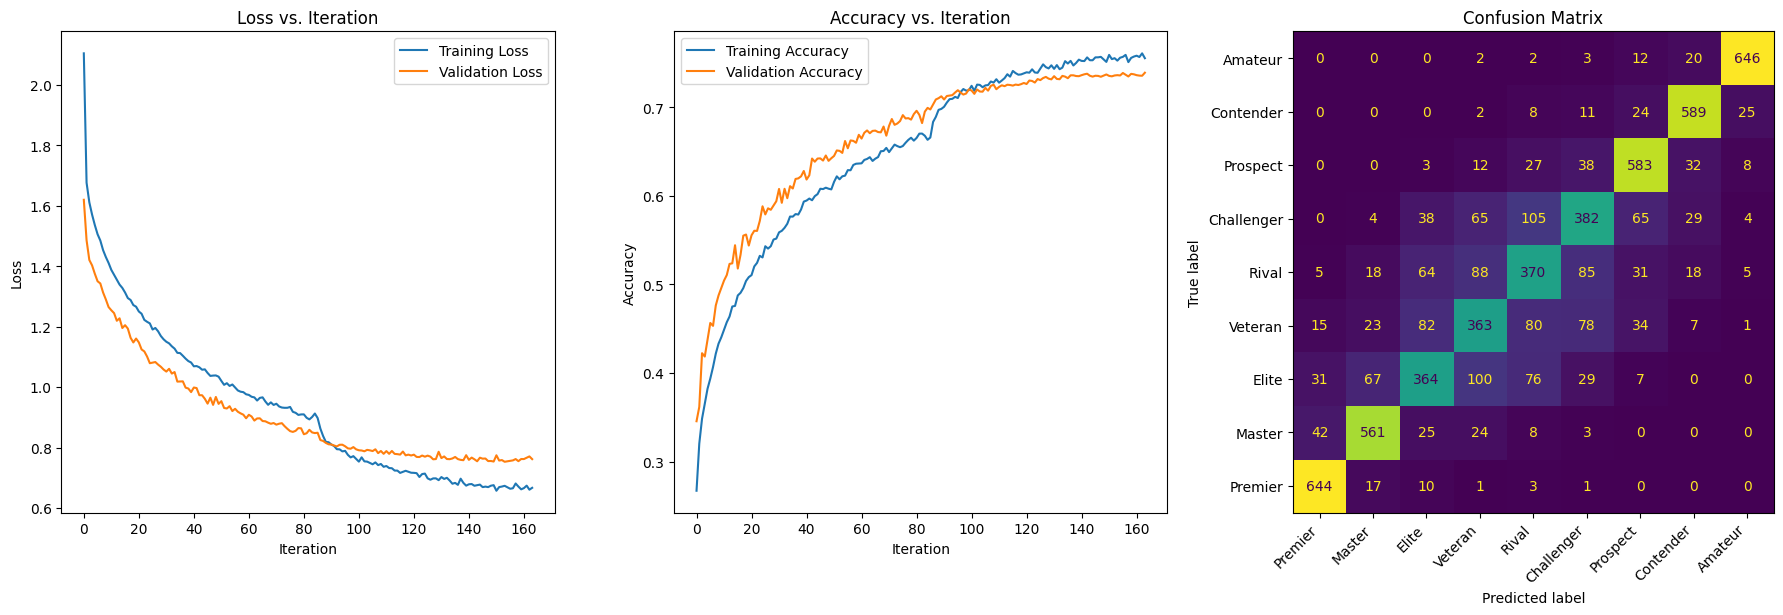

In [ ]:
#@title Plotting
classes = [
    "Premier",
    "Master",
    "Elite",
    "Veteran",
    "Rival",
    "Challenger",
    "Prospect",
    "Contender",
    "Amateur"
]

# Create a single row with three subplots
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

# Plot training loss
ax0 = plt.subplot(gs[0])
ax0.plot(history.history['loss'], label='Training Loss')
ax0.plot(history.history['val_loss'], label='Validation Loss')
ax0.set_title('Loss vs. Iteration')
ax0.set_xlabel('Iteration')
ax0.set_ylabel('Loss')
ax0.legend()

# Plot training accuracy
ax1 = plt.subplot(gs[1])
ax1.plot(history.history['categorical_accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy vs. Iteration')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Predict the classes on the test set
y_pred = np.argmax(model.predict(X_test_scaled.astype('float16')), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix without color bar
ax2 = plt.subplot(gs[2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format=".4g", ax=ax2, colorbar=False)
ax2.set_title('Confusion Matrix')

# Rotate the bottom labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Flip the x-axis
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
model.save("ballsnet1.2_optimized.keras")

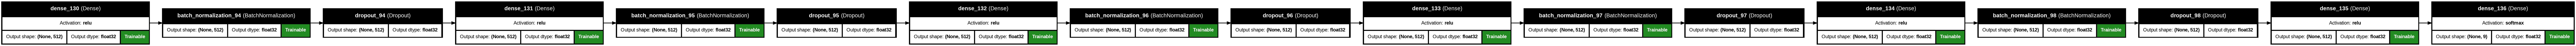

In [ ]:
keras.utils.plot_model(
    model,
    to_file="ballsnet.png",
    show_shapes=True,
        show_dtype=True,
        show_layer_names=True,
        rankdir='LR',
        expand_nested=True,
        # dpi=dpi,
        show_layer_activations=True,
        show_trainable=True,
)

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(criterion='gini', random_state=42)

# Perform Randomized Search Cross Validation
search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, cv=5, scoring='accuracy')
search.fit(X_train_scaled, y_train_categorical)

# Get the best model from the search
best_rf_model = search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_rf_model.score(X_test_scaled, y_test_categorical)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Use permutation_importance to analyze feature importance
result = permutation_importance(best_rf_model, X_test_scaled, y_test_categorical, n_repeats=10, random_state=42)

['cumulative.core.mvp', 'game_average.core.mvp', 'cumulative.positioning.time_most_back', 'cumulative.positioning.time_behind_ball', 'cumulative.play_duration', 'cumulative.core.assists', 'cumulative.boost.time_boost_0_25', 'cumulative.movement.total_distance', 'cumulative.movement.time_low_air', 'cumulative.boost.amount_collected', 'cumulative.boost.time_boost_25_50', 'cumulative.movement.time_boost_speed', 'cumulative.wins', 'cumulative.positioning.time_offensive_half', 'cumulative.boost.count_stolen_big', 'cumulative.positioning.time_offensive_third', 'cumulative.boost.time_boost_75_100', 'cumulative.boost.count_collected_small', 'cumulative.boost.amount_overfill', 'cumulative.core.shots', 'cumulative.boost.amount_stolen_small', 'cumulative.boost.amount_stolen', 'cumulative.positioning.time_defensive_third', 'cumulative.core.goals_against', 'cumulative.positioning.time_neutral_third', 'cumulative.positioning.time_defensive_half', 'cumulative.boost.amount_collected_big', 'cumulative.

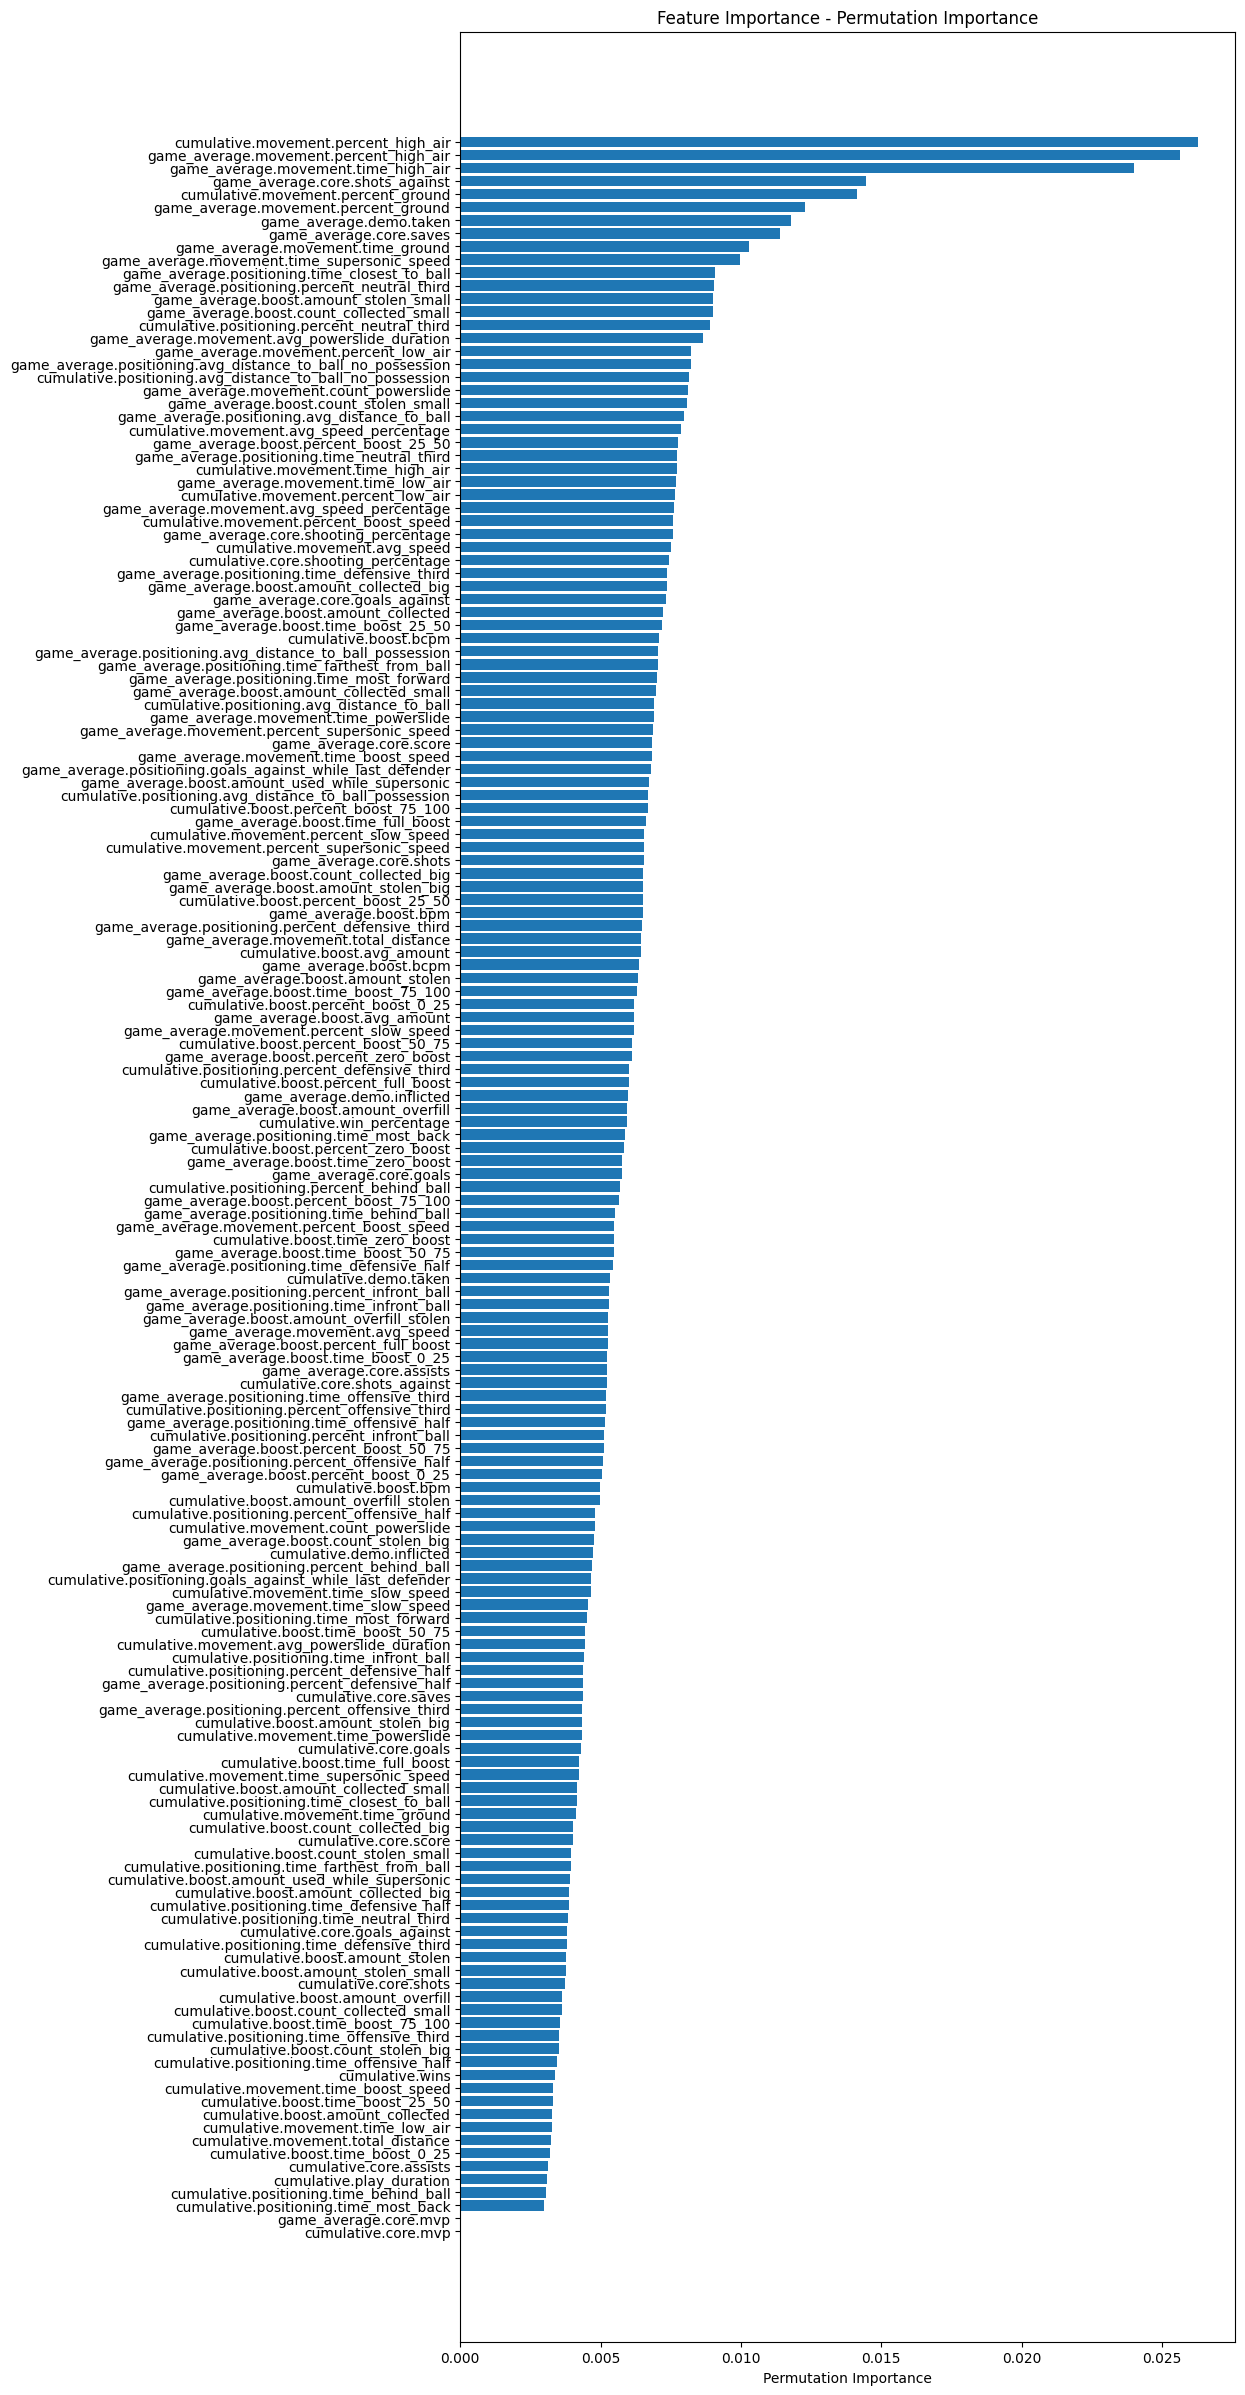

In [ ]:
# Extract feature importance scores
# Plot feature importance
feature_importance = best_rf_model.feature_importances_
feature_names = temp_player_df.drop(columns=['rank'], axis=1).columns  # Assuming you have column names for your features

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
sorted_feature_names = feature_names[sorted_idx]
print(list(sorted_feature_names))

# Plotting
plt.figure(figsize=(10, 30))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - Permutation Importance")
plt.show()

In [ ]:
test_url = "https://ballchasing.com/api/groups/12-2-tourney-groups-mker46age6/"
headers = {'Authorization': '8wjl1G9d8V8Ymfju7hH8K57aKNUiNhYe5oOYOxNr'}
response = requests.get(test_url, headers=headers)
data = json.loads(response.text)
temp_df = pd.json_normalize(data)

In [ ]:
for i in range(len(temp_df)):
  rank_df = pd.DataFrame(pd.json_normalize(temp_df.iloc[i]['players']))
  for j in range(len(rank_df)):
    temp_df = pd.DataFrame(rank_df.iloc[j]).T
    temp_df['rank'] = df.iloc[i]['rank']
    player_df = temp_df if i == 0 and j == 0 else pd.concat([player_df, temp_df])

display(player_df)

,platform,id,name,team,cumulative.games,cumulative.wins,cumulative.win_percentage,cumulative.play_duration,cumulative.core.shots,cumulative.core.shots_against,...,game_average.positioning.percent_defensive_third,game_average.positioning.percent_offensive_third,game_average.positioning.percent_neutral_third,game_average.positioning.percent_defensive_half,game_average.positioning.percent_offensive_half,game_average.positioning.percent_behind_ball,game_average.positioning.percent_infront_ball,game_average.demo.inflicted,game_average.demo.taken,rank
0,Steam,76561198102062913,Andrew,NOVA,14,8,57.142857,4961,39,105,...,44.81746,24.912014,30.270529,60.070953,39.929043,67.95556,32.04444,1.214286,0.857143,1
1,Epic,14417a5fe6704fe7b80ad945fc87e273,ChaMP0.,PHEONIX,7,3,42.857143,2438,18,58,...,51.74808,17.477097,30.774824,68.19472,31.805285,70.59572,29.404285,0.428571,0.857143,1
2,Epic,3c49a32de9f949329713773dd89eeb51,Irozuh-,PHEONIX,1,0,0.0,350,0,10,...,56.6323,20.7263,22.641403,69.11359,30.88642,68.54625,31.45375,0.0,1.0,1
3,Epic,4ef5fe96450e462ca25a8046b01ced65,Jolly Smith,T-BIRDS,7,3,42.857143,2523,18,61,...,52.65885,17.864119,29.477034,68.9962,31.003798,76.11565,23.884348,0.571429,0.857143,1
4,Epic,2a645e6b3bf84e6bbfc62233fa789365,MrPenguin_RL,PHEONIX,7,3,42.857143,2438,16,58,...,54.235653,17.88755,27.876793,69.57632,30.423685,71.5882,28.411795,0.857143,1.0,1
5,PS4,OPHB_Bakaman,OPHB_Bakaman,PHEONIX,6,3,50.0,2088,15,48,...,50.549236,19.19474,30.256018,66.45889,33.54111,71.821785,28.178215,1.0,1.166667,1
6,Steam,76561198249767150,Pluncher,T-BIRDS,7,3,42.857143,2523,13,61,...,50.01483,19.370314,30.614853,65.57339,34.426617,73.824005,26.175991,0.714286,1.142857,1
7,Steam,76561198026736312,Xeia,T-BIRDS,7,3,42.857143,2523,25,61,...,44.26527,24.726965,31.007765,61.00601,38.99399,65.67629,34.323704,0.428571,1.142857,1
8,Steam,76561198858173204,bEn,NOVA,14,8,57.142857,4961,49,105,...,44.746716,24.110266,31.143015,60.51078,39.489216,71.08743,28.912561,1.214286,0.285714,1
9,Steam,76561198117588686,siborg24,NOVA,14,8,57.142857,4961,31,105,...,47.606667,20.56793,31.825405,64.284485,35.71552,72.61511,27.384893,0.642857,0.785714,1


In [ ]:
temp_player_df = player_df.drop(columns=['platform'], axis=1)
temp_player_df = temp_player_df.drop(columns=['id'], axis=1)
names = temp_player_df['name']
temp_player_df = temp_player_df.drop(columns=['name'], axis=1)
temp_player_df = temp_player_df.drop(columns=['team'], axis=1)

temp_player_df = temp_player_df.drop(columns=['cumulative.games'], axis=1)
# temp_player_df = temp_player_df.filter(like='percent')
# X = np.asarray(temp_player_df)
x = np.asarray(temp_player_df.drop(columns=['rank'], axis=1))

x_scaled = scaler.transform(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


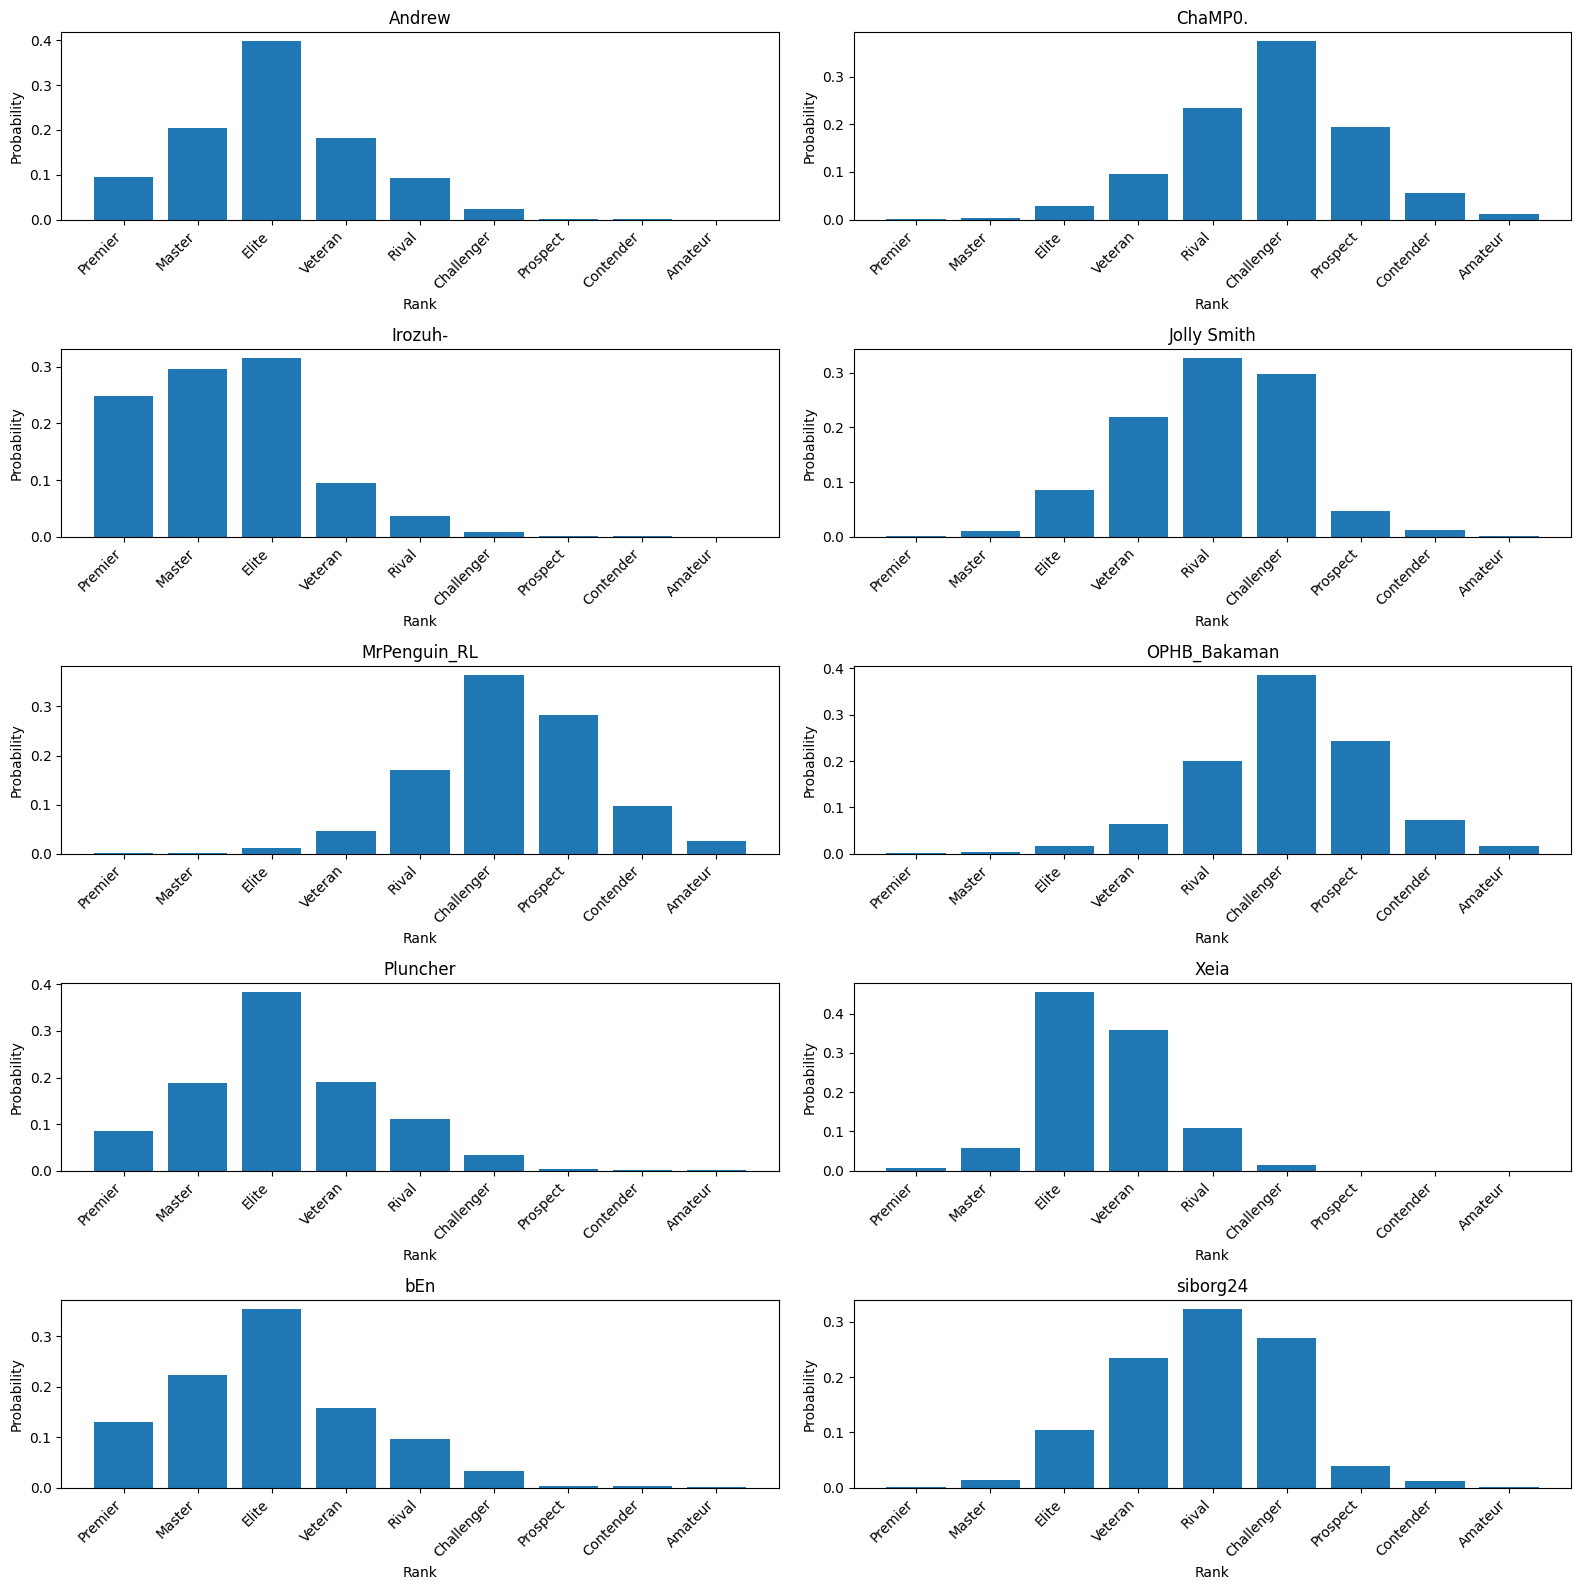

In [ ]:
predictions = model.predict(x_scaled, batch_size=None, verbose=1)

# print(predictions)

# Set the number of classes
num_classes = 9

# Calculate the number of rows and columns for the grid
num_samples = len(predictions)
num_rows = int(np.ceil(num_samples / 2))
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Plot each sample's predictions
for i, pred in enumerate(predictions):
    row_idx = i // num_cols
    col_idx = i % num_cols

    ax = axes[row_idx, col_idx] if num_samples > 1 else axes

    ax.bar(range(num_classes), pred)
    ax.set_xlabel('Rank')
    ax.set_ylabel('Probability')
    ax.set_title(f'{names[i]}')
    ax.set_xticks(range(num_classes))
    ax.set_xticklabels(classes, rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()